In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
df = pd.read_csv("../loan/loan_data_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [32]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
# Remove ID column
df.drop('Loan_ID', axis=1, inplace=True)

#nFilling in missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

C:\Users\Ali\AppData\Local\Temp\ipykernel_4076\3754829822.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
C:\Users\Ali\AppData\Local\Temp\ipykernel_4076\3754829822.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [34]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [35]:
# Convert categorical to numeric

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df = pd.get_dummies(df, columns=['Property_Area'], drop_first= True)

In [37]:
df.dtypes

Gender                       int64
Married                      int64
Dependents                   int32
Education                    int64
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
Property_Area_Semiurban       bool
Property_Area_Urban           bool
dtype: object

### Splitting data for training, evaluation, and testing

In [40]:
# Define feature & label

X = df.drop('Loan_Status', axis= 1)
y = df['Loan_Status']

In [41]:
# Train+Val & Test

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

In [42]:
# Train & Validation
# 0.235 × 85% ≈ 20% of total data
# 0.765 × 85% ≈ 65% of total data

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.235, random_state=42, stratify= y_temp)

In [43]:
print(len(X_train), len(X_val), len(X_test))

398 123 93


##### *Normalization makes features have the same range and scale.
##### *Distance-based (KNN) and gradient descent (ANN) models are highly sensitive to scale.
##### *Simple linear models such as Logistic Regression are usually less affected by scale.

### Normalization of training data

In [47]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### Definition of models

In [48]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'ANN': MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
}

### Training (logistic regression, KNN, ANN) model with and without normalization on validation data

In [60]:
print("Accuracy on Validation Set:\n")
for name, model in models.items():
    # without normalization
    model.fit(X_train, y_train)  
    y_pred_val = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred_val)
    print(f"{name} (without normalization): {acc:.2f}")

print("\n with normalization: ")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred_val = model.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_pred_val)
    print(f"{name} (with normalization): {acc:.2f}")


Accuracy on Validation Set:

Logistic Regression (without normalization): 0.78
KNN (without normalization): 0.67
ANN (without normalization): 0.52

 with normalization: 
Logistic Regression (with normalization): 0.78
KNN (with normalization): 0.74


c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ANN (with normalization): 0.67


c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


### Evaluation on test data

In [62]:
# Merge Train and Val for final training
X_final_train = pd.concat([pd.DataFrame(X_train_scaled), pd.DataFrame(X_val_scaled)], axis=0).reset_index(drop=True)
y_final_train = pd.concat([y_train, y_val], axis=0).reset_index(drop=True)

print("\nAccuracy on Test Set:\n")

for name, model in models.items():
    model.fit(X_final_train, y_final_train)
    y_pred_test = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_test)
    print(f"{name}: {acc:.2f}")


Accuracy on Test Set:

Logistic Regression: 0.85
KNN: 0.84
ANN: 0.73


### Drawing a comparison chart

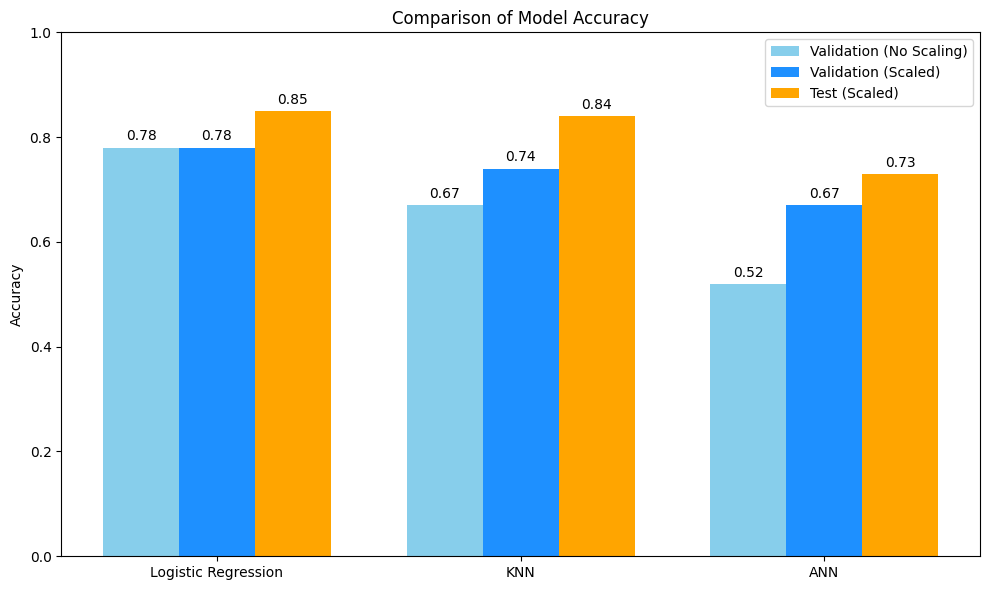

In [66]:
import matplotlib.pyplot as plt
import numpy as np

val_accuracies = [0.78, 0.74, 0.67]     # Logistic, KNN, ANN - validation (scaled)
val_no_scaling = [0.78, 0.67, 0.52]     # Logistic, KNN, ANN - validation (not scaled)
test_accuracies = [0.85, 0.84, 0.73]    # Logistic, KNN, ANN - test (scaled only)

labels = ['Logistic Regression', 'KNN', 'ANN']
x = np.arange(len(labels))  
width = 0.25                

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, val_no_scaling, width, label='Validation (No Scaling)', color='skyblue')
rects2 = ax.bar(x, val_accuracies, width, label='Validation (Scaled)', color='dodgerblue')
rects3 = ax.bar(x + width, test_accuracies, width, label='Test (Scaled)', color='orange')

ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Model Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
ax.legend()
ax.bar_label(rects1, fmt='%.2f', padding=3)
ax.bar_label(rects2, fmt='%.2f', padding=3)
ax.bar_label(rects3, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()